# imports

In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from prophet import Prophet

In [2]:
weather = pd.read_csv('data/madrid_weather.csv', parse_dates=['time'])
weather.head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0


<AxesSubplot:xlabel='time'>

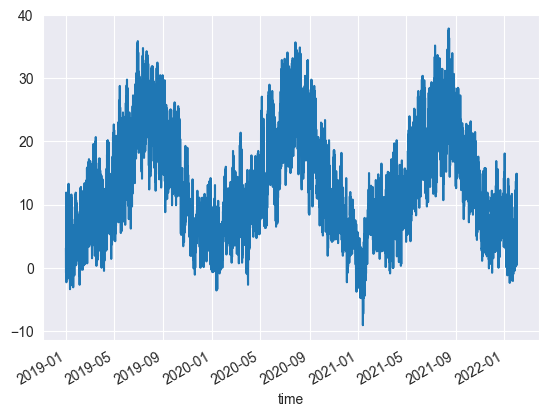

In [3]:
# 3 years of data
weather.set_index('time').loc[:, "temperature"].plot()

<AxesSubplot:xlabel='time'>

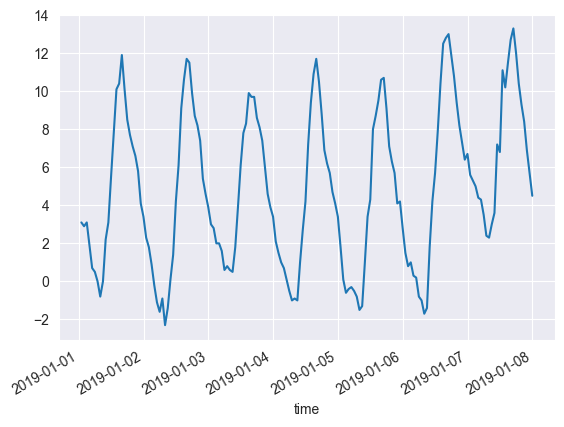

In [4]:
# the 1st week
weather.set_index('time').loc[:"2019-01-07", "temperature"].plot()

<AxesSubplot:xlabel='time'>

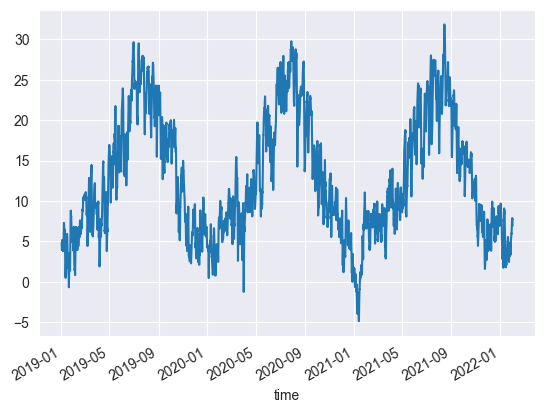

In [5]:
# 24 = daily moving avg
# (24*30) = 30-day moving avg
# 24 * 365 = yearly moving avg

weather.set_index('time').loc[:, "temperature"].rolling(24).mean().plot()

<AxesSubplot:xlabel='time'>

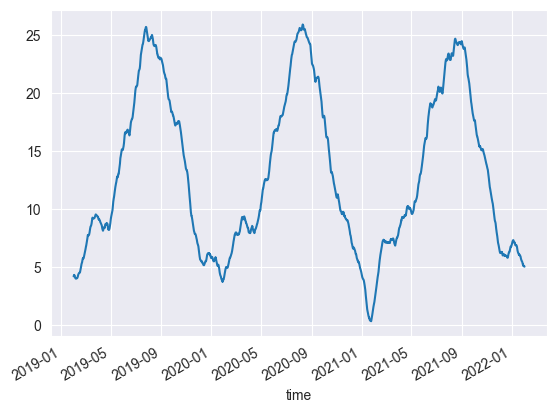

In [6]:
weather.set_index('time').loc[:, "temperature"].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='time'>

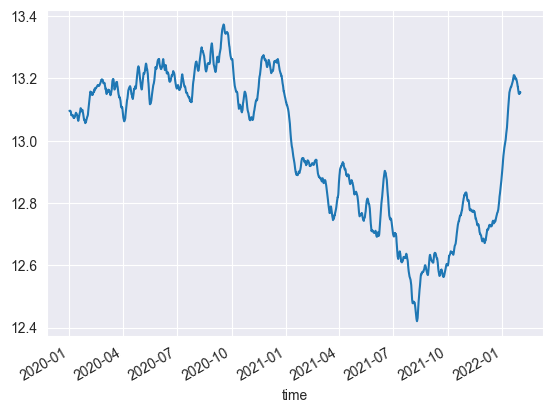

In [7]:
weather.set_index('time').loc[:, "temperature"].rolling(24*365).mean().plot()

# Prophet

In [9]:
# hourly weather data
weather.head(10)

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0
5,2019-01-01 05:59:00,0.5,0.57,24,53,949,0,0.0
6,2019-01-01 06:59:00,0.0,0.80,345,55,949,0,0.0
7,2019-01-01 07:59:00,-0.8,0.85,78,60,949,0,0.0
8,2019-01-01 08:59:00,0.0,0.90,34,56,949,10,0.0
9,2019-01-01 09:59:00,2.2,0.73,84,48,950,99,0.0


## set index to time column

In [0]:
weather.set_index('time', inplace=True)

## split train/test

In [17]:
weather_train = weather["2019-05-17":"2019-05-31"].reset_index()
weather_train

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-05-17 00:59:00,9.1,5.78,289,62,933,0,0.1
1,2019-05-17 01:59:00,9.0,5.95,299,60,933,0,0.0
2,2019-05-17 02:59:00,8.5,4.88,249,59,933,0,0.0
3,2019-05-17 03:59:00,8.0,4.28,304,59,934,0,0.0
4,2019-05-17 04:59:00,7.9,5.78,278,57,934,0,0.0
...,...,...,...,...,...,...,...,...
355,2019-05-31 19:59:00,27.2,1.45,146,12,942,327,0.0
356,2019-05-31 20:59:00,27.1,1.18,106,12,942,126,0.0
357,2019-05-31 21:59:00,25.6,1.27,182,15,942,8,0.0
358,2019-05-31 22:59:00,24.2,1.37,213,18,943,0,0.0


In [18]:
weather_test = weather["2019-06-01":"2019-06-03"].reset_index()

## prophet model

In [21]:
weather_train = weather_train.rename(columns={"time": "ds", "temperature": "y"})
weather_train

,ds,y,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-05-17 00:59:00,9.1,5.78,289,62,933,0,0.1
1,2019-05-17 01:59:00,9.0,5.95,299,60,933,0,0.0
2,2019-05-17 02:59:00,8.5,4.88,249,59,933,0,0.0
3,2019-05-17 03:59:00,8.0,4.28,304,59,934,0,0.0
4,2019-05-17 04:59:00,7.9,5.78,278,57,934,0,0.0
...,...,...,...,...,...,...,...,...
355,2019-05-31 19:59:00,27.2,1.45,146,12,942,327,0.0
356,2019-05-31 20:59:00,27.1,1.18,106,12,942,126,0.0
357,2019-05-31 21:59:00,25.6,1.27,182,15,942,8,0.0
358,2019-05-31 22:59:00,24.2,1.37,213,18,943,0,0.0


In [22]:
model = Prophet()
model.fit(weather_train)

03:29:13 - cmdstanpy - INFO - Chain [1] start processing
03:29:14 - cmdstanpy - INFO - Chain [1] done processing


## make_future_dataframe()

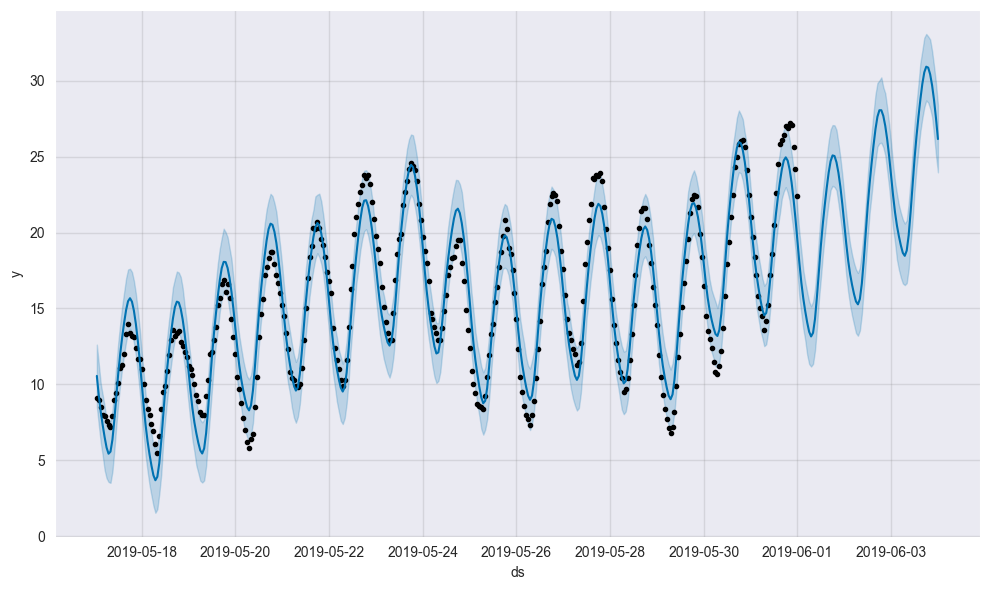

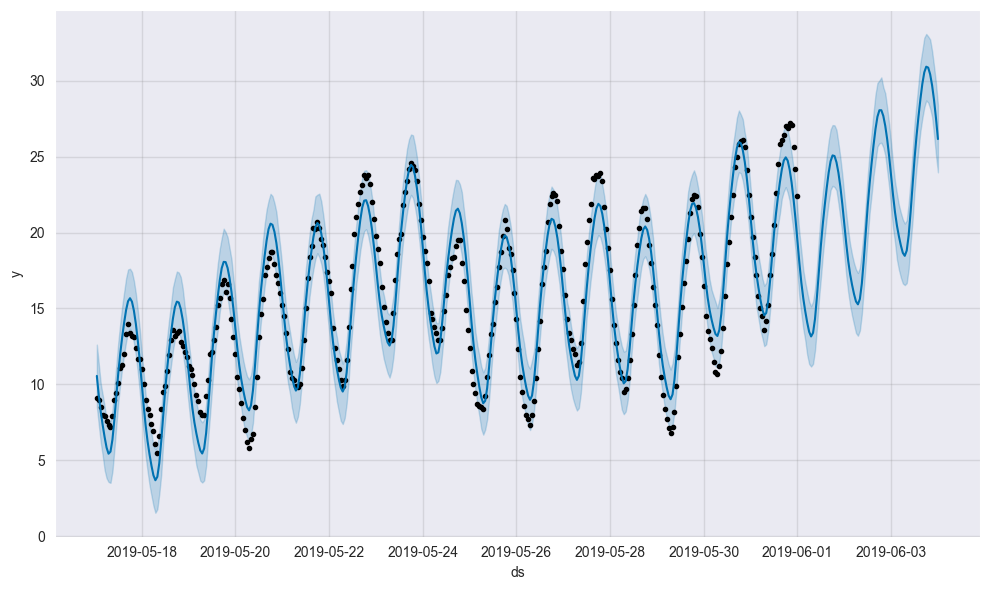

In [23]:
future = model.make_future_dataframe(periods=72, freq="H")
forecast = model.predict(future)
model.plot(forecast)

In [24]:
print(type(future), type(forecast))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [25]:
future.head(10)

,ds
0,2019-05-17 00:59:00
1,2019-05-17 01:59:00
2,2019-05-17 02:59:00
3,2019-05-17 03:59:00
4,2019-05-17 04:59:00
5,2019-05-17 05:59:00
6,2019-05-17 06:59:00
7,2019-05-17 07:59:00
8,2019-05-17 08:59:00
9,2019-05-17 09:59:00


In [26]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-17 00:59:00,9.573557,8.537896,12.615151,9.573557,9.573557,0.981305,0.981305,0.981305,-1.045705,-1.045705,-1.045705,2.027010,2.027010,2.027010,0.0,0.0,0.0,10.554861
1,2019-05-17 01:59:00,9.626616,7.334845,11.332182,9.626616,9.626616,-0.364231,-0.364231,-0.364231,-2.301638,-2.301638,-2.301638,1.937407,1.937407,1.937407,0.0,0.0,0.0,9.262385
2,2019-05-17 02:59:00,9.679674,6.187870,10.059292,9.679674,9.679674,-1.482588,-1.482588,-1.482588,-3.320268,-3.320268,-3.320268,1.837680,1.837680,1.837680,0.0,0.0,0.0,8.197086
3,2019-05-17 03:59:00,9.732733,5.323125,9.306208,9.732733,9.732733,-2.421369,-2.421369,-2.421369,-4.149894,-4.149894,-4.149894,1.728525,1.728525,1.728525,0.0,0.0,0.0,7.311364
4,2019-05-17 04:59:00,9.785792,4.349569,8.529221,9.785792,9.785792,-3.268710,-3.268710,-3.268710,-4.879409,-4.879409,-4.879409,1.610698,1.610698,1.610698,0.0,0.0,0.0,6.517082
5,2019-05-17 05:59:00,9.838851,3.817213,7.674196,9.838851,9.838851,-4.009251,-4.009251,-4.009251,-5.494262,-5.494262,-5.494262,1.485011,1.485011,1.485011,0.0,0.0,0.0,5.829600
6,2019-05-17 06:59:00,9.891910,3.570961,7.533190,9.891910,9.891910,-4.462259,-4.462259,-4.462259,-5.814581,-5.814581,-5.814581,1.352321,1.352321,1.352321,0.0,0.0,0.0,5.429650
7,2019-05-17 07:59:00,9.944968,3.509512,7.547678,9.944968,9.944968,-4.379791,-4.379791,-4.379791,-5.593317,-5.593317,-5.593317,1.213525,1.213525,1.213525,0.0,0.0,0.0,5.565177
8,2019-05-17 08:59:00,9.998027,4.270692,8.263680,9.998027,9.998027,-3.636863,-3.636863,-3.636863,-4.706412,-4.706412,-4.706412,1.069549,1.069549,1.069549,0.0,0.0,0.0,6.361164
9,2019-05-17 09:59:00,10.051086,5.710352,9.828020,10.051086,10.051086,-2.352917,-2.352917,-2.352917,-3.274259,-3.274259,-3.274259,0.921342,0.921342,0.921342,0.0,0.0,0.0,7.698169


# Demo: Prophet 

In [35]:
weather = pd.read_csv('data/madrid_weather.csv', parse_dates=['time'])
monthly_weather = (
    weather
    .set_index('time')
    .resample('M')
    .agg({'temperature': 'mean'})
    .reset_index()
    .rename(columns={'time': 'ds', 'temperature': 'y'})
)
monthly_weather

,ds,y
0,2019-01-31,4.267473
1,2019-02-28,6.645982
2,2019-03-31,9.244489
3,2019-04-30,9.032222
4,2019-05-31,15.345968
5,2019-06-30,20.410278
6,2019-07-31,24.588978
7,2019-08-31,23.026882
8,2019-09-30,18.002083
9,2019-10-31,13.575134


## train test split

In [36]:
# train on first 8 months
train = monthly_weather[:-4]
train

,ds,y
0,2019-01-31,4.267473
1,2019-02-28,6.645982
2,2019-03-31,9.244489
3,2019-04-30,9.032222
4,2019-05-31,15.345968
5,2019-06-30,20.410278
6,2019-07-31,24.588978
7,2019-08-31,23.026882
8,2019-09-30,18.002083
9,2019-10-31,13.575134


In [37]:
# test on last 4 months
test = monthly_weather[-4:]
test 

,ds,y
33,2021-10-31,13.863306
34,2021-11-30,6.686667
35,2021-12-31,6.859140
36,2022-01-31,5.027500


## Prophet model

In [38]:
model = Prophet()
model.fit(train)

03:55:47 - cmdstanpy - INFO - Chain [1] start processing
03:55:47 - cmdstanpy - INFO - Chain [1] done processing


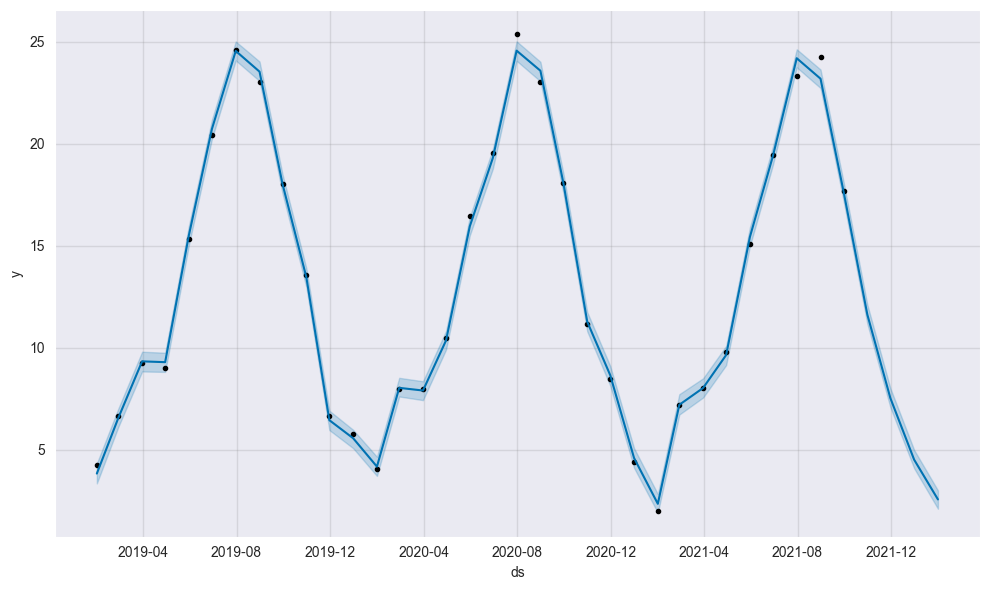

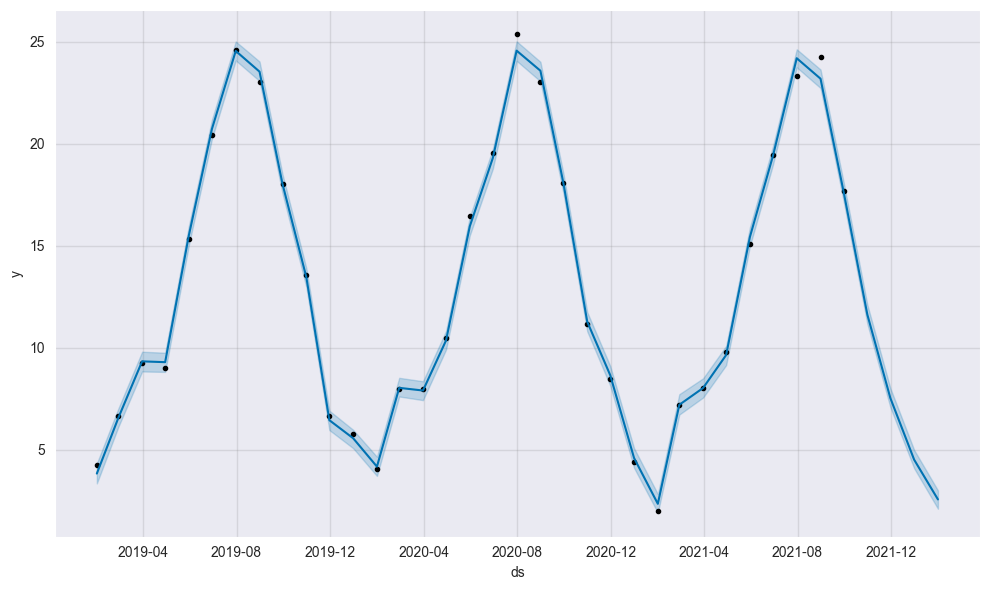

In [39]:
future_df = model.make_future_dataframe(periods=4, freq='M')
forecast_df = model.predict(future_df)
model.plot(forecast_df)